In [1]:
import os
import sys
home_dir = "../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
id_seq_df = pd.read_csv("/usr/projects/pyDNA_EPBD/pyDNA_EPBD_inputs_outputs/data/88_sequences/seqs/88_sequences_raw.txt", sep=" ", header=None, names=["id", "seq"])
id_seq_df["seq_len"] = id_seq_df["seq"].apply(lambda x: len(x))
id_seq_df

,id,seq,seq_len
0,S67BP,GCCGATCATGGAGTTATATCTGAGGGAAACTGGACTGATAGGAGTG...,61
1,S69BP,GCCGATCATGGAGTTATATCTGAGGGAAACTGGGTACTGATAGGAG...,63
2,S71BP,GCCGATCATGGAGTTATATCTGAGGGAAGATTAACTGACTGATAGG...,65
3,S73BP,GCCGATCATGGAGTTATATCTGAGGGAAGATTAACTGGTACTGATA...,67
4,TA_63bp,GCAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCTACCGCGT...,67
...,...,...,...
83,ACAT_201bp,GCAGCTTACACATATATACACATACATATACACACACATATACTGC...,205
84,ACCAGG_201bp,GCAGCTTACCAGGAGGACCACCAGGACCACCACCAGGAGGAGCTGC...,205
85,LPL2_201bp,GCAGCTTGCATAGGCATTAGCCATGCATAGGCATATGGCATTAGGC...,205
86,CA_322bp,GCGGCCGCTCTAGAACTAGTGGATCCCCCGGGCTGCAGGAATTCGA...,326


In [3]:
runtimes_df = pd.read_csv("/usr/projects/pyDNA_EPBD/pyDNA_EPBD_inputs_outputs/outputs_runtimes/88seqs_10runs_100iters.txt", 
                            sep=":", header=None, names=["run_num", "filepath", "runtime_secs"])
runtimes_df = runtimes_df[runtimes_df["run_num"]!=0]
runtimes_df["id"] = runtimes_df["filepath"].apply(lambda x: x.split("/")[-1][:-4])
avg_runtimes = runtimes_df.groupby(by=["id"], as_index=False)["runtime_secs"].mean().rename(columns={'runtime_secs':'avg_runtime_secs'})
std_runtimes = runtimes_df.groupby(by=["id"], as_index=False)["runtime_secs"].std().rename(columns={'runtime_secs':'std_runtime_secs'})
std_runtimes

/tmp/ipykernel_105016/2245247435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtimes_df["id"] = runtimes_df["filepath"].apply(lambda x: x.split("/")[-1][:-4])


,id,std_runtime_secs
0,12M_126bp,0.761319
1,5S_105bp,0.744487
2,5S_90bp,0.686438
3,5S_93bp,0.603660
4,5S_94bp,0.623360
...,...,...
83,TA_93bp,0.601899
84,TA_94bp,0.544251
85,TA_95bp,0.896562
86,TA_96bp,0.595009


In [4]:
id_seq_len_runtime_df = pd.merge(id_seq_df, avg_runtimes, on="id", how="inner")
id_seq_len_runtime_df.sort_values("seq_len", ignore_index=True, inplace=True)
id_seq_len_runtime_df.head(50)

,id,seq,seq_len,avg_runtime_secs
0,S67BP,GCCGATCATGGAGTTATATCTGAGGGAAACTGGACTGATAGGAGTG...,61,6.085185
1,S69BP,GCCGATCATGGAGTTATATCTGAGGGAAACTGGGTACTGATAGGAG...,63,6.453350
2,S71BP,GCCGATCATGGAGTTATATCTGAGGGAAGATTAACTGACTGATAGG...,65,6.387665
3,S73BP,GCCGATCATGGAGTTATATCTGAGGGAAGATTAACTGGTACTGATA...,67,6.738582
4,TA_63bp,GCAGCTCTAGCACCGCTTAAACGCACGTACGCGCTGTCTACCGCGT...,67,6.270482
5,E817_63bp,GCTTTTATTTATCGCCTCCACGGTGCTTTTTTTTTTTTTTTTTGGC...,67,6.615169
6,E838_63bp,GCTTTTATTTATCGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,67,6.926439
7,E8A10_63bp,GCTTTTATTTATCGCCTCCACGGTGCTGTTTTTTTTTTCTGTTGGC...,67,6.614271
8,E8A26_63bp,GCTTTTATTTATCGCCTCCTTTTTTTTTTTTTTTTTTTTTTTTTTC...,67,6.938548
9,S74BP,GCCGATCATGGAGTTATATCTGAGGGAAATTCAACTGGGTACTGAT...,68,6.720072


In [8]:
x = id_seq_len_runtime_df[id_seq_len_runtime_df["seq_len"]>150]
id_seq_len_runtime_df = id_seq_len_runtime_df[~id_seq_len_runtime_df["id"].isin(["AGAT_200bp", "ACAT_201bp"])]
x


,id,seq,seq_len,avg_runtime_secs
72,S201BP,GCCGATCATGGAGTTATATCTGAGGGATAGTCATGCTTCGACCCGA...,195,17.602190
73,CAACTT_198bp,GCAGCTTCAACTTCTTCAACAACAACTTCTTCTTCAACTCTGCAGC...,202,19.313283
74,HPL1_198bp,GCAGCTTCGATTGCGCATTCGATTGGAGTCTCCGCTGCCATTGCAT...,202,18.015394
75,HPL2_198bp,GCAGCTTACGACGAACGACGACGAACGACGAACGAACGACGAACGC...,202,18.244619
76,ACGAGC_199bp,GCAGCTTAGCACGACGAGCAGCACGAGCAGCAGCACGACGCTGCAG...,203,18.413644
77,AGC_199bp,GCAGCTTAGCAGCAGCAGCAGCTAGCAGCAGCAGCCTGCAGAGCAG...,203,18.370611
78,CATCTA_200bp,GCAGCTTCATCTACTACATCATCATCTACTACATCTACATCCTGCA...,204,19.443367
79,LPL1_200bp,GCAGCTTTAGTAGCCTAGTAGCCTAGAGTCTCCGCTGCCATTGCCC...,204,19.043383
80,CAA_200bp,GCAGCTTACAACAACAACAACCTGCAGAACCAACAACAAGCACAAC...,204,18.778123
82,CAGT_200bp,GCAGCTTCAGTCAGTCAGTCTGACAGTCAGTCAGTCAGTCAGTCAG...,204,18.407299


[0.0873756  0.93076032]


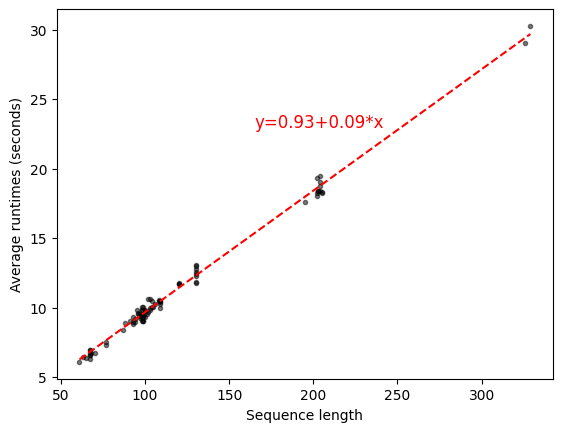

In [11]:
import seaborn as sns
fit = np.polyfit(id_seq_len_runtime_df["seq_len"], id_seq_len_runtime_df["avg_runtime_secs"], 1)
print(fit)

seq_lens = id_seq_len_runtime_df["seq_len"]

plt.scatter(id_seq_len_runtime_df["seq_len"], id_seq_len_runtime_df["avg_runtime_secs"], marker=".", facecolors=None, alpha=0.5, color="black")
plt.plot(seq_lens, fit[0]*seq_lens+fit[1], linestyle='--', c="r")
plt.text(165, 23, 'y={:.2f}+{:.2f}*x'.format(fit[1], fit[0]), color='r', size=12)
plt.xlabel("Sequence length")
plt.ylabel("Average runtimes (seconds)")
# plt.show()
plt.savefig(home_dir+"plots/88seqs_seqlen_vs_runtime.png", dpi=300, format="png", bbox_inches='tight', pad_inches=.05)